In [110]:
import os

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
sns.set()
sns.set_context("paper", font_scale=1.2)

In [128]:
df = pd.read_csv("matching_scores.csv")
# drop the first column
df = df.drop(df.columns[0], axis=1)
# set the index to the file_name
df = df.set_index('file_name')
df.index = df.index.map(lambda x: x[x.rfind('/') + 1:])

In [129]:
df = df[df['reversed_best'] == False]

In [130]:
df

,rotation,max_val,rotation_reverse,max_val_reverse,score,reversed_diff,reversed_best,channel,roll,pitch,yaw,channel_reverse,roll_reverse,pitch_reverse,yaw_reverse
file_name,,,,,,,,,,,,,,,
A231214_10300399.png,"roll: 344.00, pitch/theta/X: 47.79, yaw/phi/Y:...",128.548344,"roll: 344.00, pitch/theta/X: 47.79, yaw/phi/Y:...",126.658636,0.014299,-1.889708,False,rgb,344,47.787,-56.25,rgb,344,47.787,-56.25
A231214_10300399.png,"roll: 345.00, pitch/theta/X: 55.45, yaw/phi/Y:...",112.166777,"roll: 345.00, pitch/theta/X: 55.45, yaw/phi/Y:...",111.081853,0.015182,-1.084925,False,rgb,345,55.450,-37.35,rgb,345,55.450,-37.35
A231214_10300399.png,"roll: 238.00, pitch/theta/X: 145.17, yaw/phi/Y...",130.941180,"roll: 238.00, pitch/theta/X: 145.17, yaw/phi/Y...",129.467736,0.016773,-1.473444,False,rgb,238,145.171,-69.75,rgb,238,145.171,-69.75
A231214_10300399.png,"roll: 239.00, pitch/theta/X: 145.17, yaw/phi/Y...",130.708473,"roll: 239.00, pitch/theta/X: 145.17, yaw/phi/Y...",129.260067,0.017563,-1.448406,False,rb,239,145.171,-69.75,rb,239,145.171,-69.75
A231214_10300399.png,"roll: 121.00, pitch/theta/X: 262.62, yaw/phi/Y...",128.244704,"roll: 121.00, pitch/theta/X: 262.62, yaw/phi/Y...",127.420061,0.017919,-0.824642,False,rb,121,262.616,-76.05,rb,121,262.616,-76.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A231214_11110706.png,"roll: 19.00, pitch/theta/X: 7.66, yaw/phi/Y: -...",129.181531,"roll: 19.00, pitch/theta/X: 7.66, yaw/phi/Y: -...",127.583543,0.057641,-1.597988,False,rg,19,7.663,-70.65,rg,19,7.663,-70.65
A231214_11110706.png,"roll: 249.00, pitch/theta/X: 137.51, yaw/phi/Y...",133.452898,"roll: 249.00, pitch/theta/X: 137.51, yaw/phi/Y...",131.962594,0.059034,-1.490304,False,rgb,249,137.508,-88.65,rgb,249,137.508,-88.65
A231214_11110706.png,"roll: 111.00, pitch/theta/X: 275.02, yaw/phi/Y...",132.827199,"roll: 111.00, pitch/theta/X: 275.02, yaw/phi/Y...",131.500363,0.059580,-1.326836,False,rb,111,275.016,-87.75,rb,111,275.016,-87.75


In [131]:
# get the list of files in folder that is .png
files = [file for file in os.listdir('.') if file.endswith('.png')]
files = sorted(files)
files_idx = list(range(len(files)))
# df_best replace file_name with index mapped
df.index = df.index.map(lambda x: files_idx[files.index(x)])

In [134]:
df.sort_values(by='max_val').groupby('file_name').last().loc[15]

rotation            roll: 51.00, pitch/theta/X: 270.28, yaw/phi/Y:...
max_val                                                    134.778162
rotation_reverse    roll: 51.00, pitch/theta/X: 270.28, yaw/phi/Y:...
max_val_reverse                                            134.595581
score                                                        0.041387
reversed_diff                                                -0.18258
reversed_best                                                   False
channel                                                            rg
roll                                                               51
pitch                                                          270.28
yaw                                                            -57.15
channel_reverse                                                    rg
roll_reverse                                                       51
pitch_reverse                                                  270.28
yaw_reverse         

In [166]:
df_best = df.sort_values(by='max_val').groupby('file_name').last()
#df_best = df.sort_values(by='score').groupby('file_name').first()
# only keep after last "/" in index

In [167]:
df_best

,rotation,max_val,rotation_reverse,max_val_reverse,score,reversed_diff,reversed_best,channel,roll,pitch,yaw,channel_reverse,roll_reverse,pitch_reverse,yaw_reverse
file_name,,,,,,,,,,,,,,,
0,"roll: 24.00, pitch/theta/X: 0.00, yaw/phi/Y: -...",140.376613,"roll: 24.00, pitch/theta/X: 0.00, yaw/phi/Y: -...",139.478181,0.046551,-0.898433,False,rgb,24,0.000,-89.55,rgb,24,0.000,-89.55
1,"roll: 33.00, pitch/theta/X: 347.60, yaw/phi/Y:...",131.003409,"roll: 33.00, pitch/theta/X: 347.60, yaw/phi/Y:...",130.008938,0.040686,-0.994472,False,rgb,33,347.601,-77.85,rgb,33,347.601,-77.85
2,"roll: 27.00, pitch/theta/X: 347.60, yaw/phi/Y:...",135.175843,"roll: 27.00, pitch/theta/X: 347.60, yaw/phi/Y:...",134.117171,0.048015,-1.058672,False,rgb,27,347.601,-77.85,rgb,27,347.601,-77.85
3,"roll: 23.00, pitch/theta/X: 347.60, yaw/phi/Y:...",137.286088,"roll: 23.00, pitch/theta/X: 347.60, yaw/phi/Y:...",136.220125,0.052972,-1.065963,False,rgb,23,347.601,-77.85,rgb,23,347.601,-77.85
4,"roll: 19.00, pitch/theta/X: 347.60, yaw/phi/Y:...",135.762189,"roll: 19.00, pitch/theta/X: 347.60, yaw/phi/Y:...",134.688790,0.056968,-1.073399,False,rgb,19,347.601,-77.85,rgb,19,347.601,-77.85
5,"roll: 90.00, pitch/theta/X: 270.28, yaw/phi/Y:...",133.397674,"roll: 90.00, pitch/theta/X: 270.28, yaw/phi/Y:...",132.853006,0.048078,-0.544668,False,rg,90,270.280,-57.15,rg,90,270.280,-57.15
6,"roll: 10.00, pitch/theta/X: 347.60, yaw/phi/Y:...",138.789272,"roll: 10.00, pitch/theta/X: 347.60, yaw/phi/Y:...",137.895130,0.055259,-0.894142,False,rgb,10,347.601,-77.85,rgb,10,347.601,-77.85
7,"roll: 354.00, pitch/theta/X: 0.00, yaw/phi/Y: ...",76.668916,"roll: 354.00, pitch/theta/X: 0.00, yaw/phi/Y: ...",76.145810,0.026903,-0.523106,False,rgb,354,0.000,-89.55,rgb,354,0.000,-89.55
8,"roll: 78.00, pitch/theta/X: 270.28, yaw/phi/Y:...",130.940345,"roll: 78.00, pitch/theta/X: 270.28, yaw/phi/Y:...",130.472241,0.037251,-0.468104,False,rg,78,270.280,-57.15,rg,78,270.280,-57.15


In [168]:
# only keep 'file_name', 'score', 'pitch', 'yaw', 'roll' columns
df_small = df_best[['score', 'pitch', 'yaw', 'roll', 'channel', 'max_val']]

In [169]:
# show index 10-15
df_small.loc[8:15]

,score,pitch,yaw,roll,channel,max_val
file_name,,,,,,
8,0.037251,270.28,-57.15,78,rg,130.940345
9,0.030585,270.28,-57.15,74,rg,134.895354
10,0.039139,270.28,-57.15,71,rg,133.947630
11,0.038970,270.28,-57.15,68,rg,140.220999
12,0.014996,270.28,-57.15,64,rg,130.834852
13,0.017685,270.28,-57.15,59,rg,128.834588
14,0.026651,270.28,-57.15,55,rg,130.711693
15,0.041387,270.28,-57.15,51,rg,134.778162


In [170]:
df_small.loc[36:42]

,score,pitch,yaw,roll,channel,max_val
file_name,,,,,,
36,0.054485,288.533,30.15,328,rg,107.494336
37,0.009990,89.030,87.75,193,gb,104.664681
38,0.012059,89.030,87.75,187,gb,103.840952
39,0.015400,89.030,87.75,181,gb,100.806045
40,0.025448,89.030,87.75,174,gb,100.508623
41,0.036719,89.030,87.75,168,gb,105.067994
42,0.052785,242.554,-83.25,190,gb,88.794353


/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

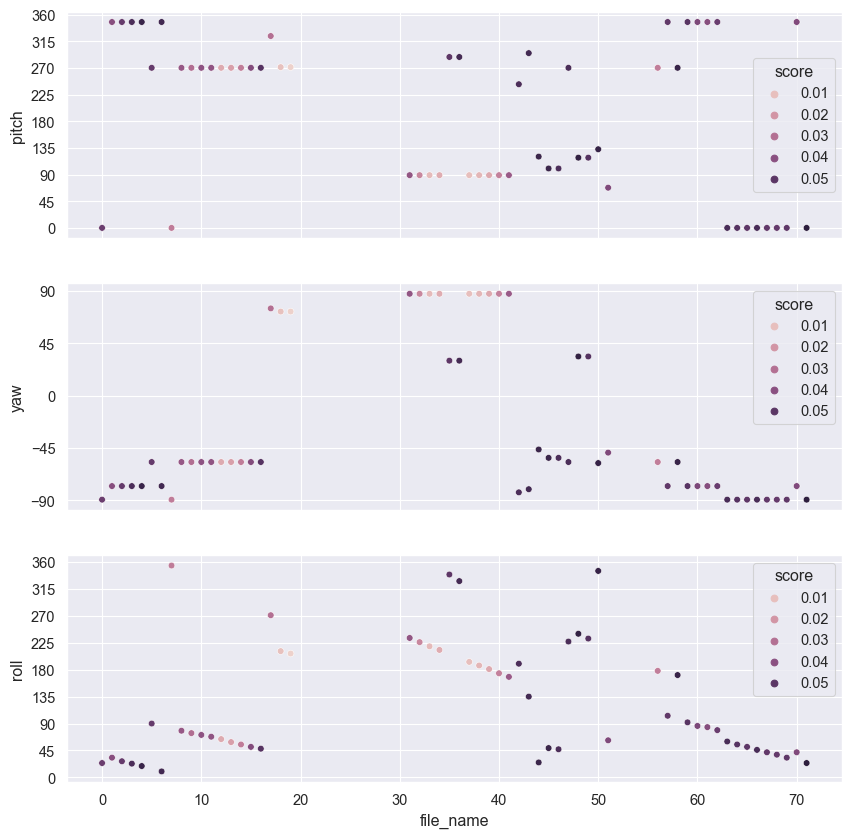

In [171]:
# plot roll, pitch, yaw in subplots with score as hue and file_name as x
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
sns.scatterplot(ax=axes[0], data=df_best, x='file_name', y='pitch', hue='score');
axes[0].set_yticks(range(0, 361, 45));
sns.scatterplot(ax=axes[1], data=df_best, x='file_name', y='yaw', hue='score');
axes[1].set_yticks(range(-90, 91, 45));
sns.scatterplot(ax=axes[2], data=df_best, x='file_name', y='roll', hue='score');
axes[2].set_yticks(range(0, 361, 45));

In [172]:
df_small['roll'].diff().median()

-4.0

/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


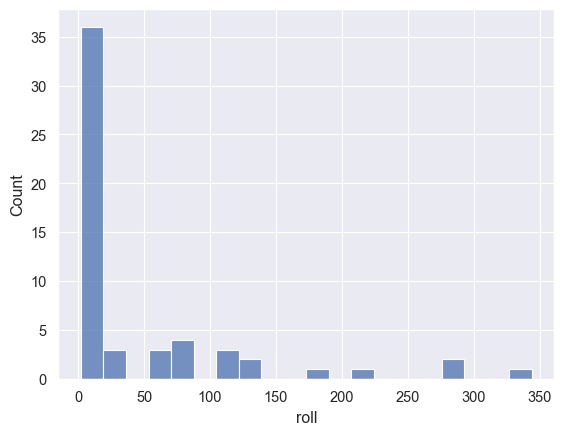

In [173]:
# find delta values for roll
# plot as histogram absoulte values
sns.histplot(df_small['roll'].diff().abs(), bins=20);

In [174]:
df_small.drop(['channel', 'max_val'], axis=1).to_csv("best_scores.csv")

In [98]:
import cv2 as cv

In [99]:
os.listdir('matching images')

['63.0.png',
 '5.0.png',
 '47.0.png',
 '45.0.png',
 '7.0.png',
 '19.0.png',
 '61.0.png',
 '58.0.png',
 '3.0.png',
 '.DS_Store',
 '65.0.png',
 '41.0.png',
 '39.0.png',
 '43.0.png',
 '67.0.png',
 '1.0.png',
 '44.0.png',
 '60.0.png',
 '18.0.png',
 '6.0.png',
 '4.0.png',
 '62.0.png',
 '46.0.png',
 '42.0.png',
 '0.0.png',
 '66.0.png',
 '64.0.png',
 '2.0.png',
 '59.0.png',
 '38.0.png',
 '40.0.png',
 '71.0.png',
 '34.0.png',
 '10.0.png',
 '68.0.png',
 '57.0.png',
 '12.0.png',
 '36.0.png',
 '32.0.png',
 '16.0.png',
 '8.0.png',
 '51.0.png',
 '14.0.png',
 '48.0.png',
 '13.0.png',
 '56.0.png',
 '37.0.png',
 '35.0.png',
 '70.0.png',
 '69.0.png',
 '11.0.png',
 '15.0.png',
 '50.0.png',
 '31.0.png',
 '49.0.png',
 '33.0.png',
 '9.0.png',
 '17.0.png']

In [ ]:
# go trough all files in folder and according to the channel in df_small replace the file with only the channel
dir = 'matching images roll'
for file in os.listdir(dir):
    try:
        if file.endswith('.png'):
            channel = df_small['channel'][int(file[:file.find('.')])]
            img = cv.imread(dir + "/" + file)
            blue_channel, green_channel, red_channel = cv.split(img)
            if channel == "rgb":
                img = cv.add(red_channel, cv.add(blue_channel, green_channel))
                cv.imwrite(dir + "/" + file, img)
            elif channel == "rg":
                img = cv.add(red_channel, green_channel)
                cv.imwrite(dir + "/" + file, img)
            elif channel == "rb":
                img = cv.add(red_channel, blue_channel)
                cv.imwrite(dir + "/" + file, img)
            elif channel == "gb":
                img = cv.add(green_channel, blue_channel)
                cv.imwrite(dir + "/" + file, img)
    except:
        print("could not find file " + file)
